# Navigation

---

This notebook contains report of the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Configure the Environment

We begin by importing some necessary packages.

In [2]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import torch
from train_agent import TrainRunner, plot_scores
from test_agent import TestRunner

Next, **_Before running the code cell below_**, ensure that you got the environment and unzipped it into one of the folders:

- **Mac**: `"Banana.app"`
- **Windows** (x86): `"./Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"./Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"./Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"./Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"./Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"./Banana_Linux_NoVis/Banana.x86_64"`



### 2. Training the Agent

To train the agent we are going to run the python class `TrainRunner` from `train_agent.py`. The `TrainRunner` will train the network and save it to file `checkpoint.pt` (later on we will be able to test the agent) 

In [2]:
trainer = TrainRunner("./Banana_Linux/Banana.x86_64", "./checkpoint.pth")
scores = trainer.run()
trainer.close()


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


device:  cuda
Episode 100	Average Score: 0.79
Episode 200	Average Score: 4.62
Episode 300	Average Score: 6.98
Episode 400	Average Score: 9.79
Episode 500	Average Score: 11.93
Episode 571	Average Score: 13.03
Environment solved in 471 episodes!	Average Score: 13.03


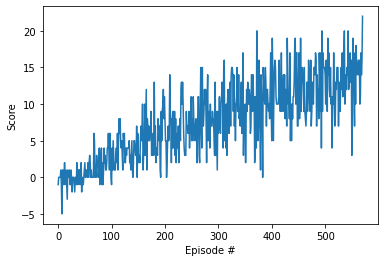

In [3]:
plot_scores(scores)

### 3. Testing the agent 

In [ ]:
TestRunner("./Banana_Linux/Banana.x86_64", "./checkpoint.pth").run()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


device:  cuda
rewards:  1.0
rewards:  2.0
rewards:  3.0
rewards:  4.0
rewards:  5.0
rewards:  6.0
rewards:  7.0
rewards:  8.0
rewards:  9.0
rewards:  10.0
rewards:  11.0
rewards:  12.0
rewards:  13.0
rewards:  14.0
rewards:  15.0
rewards:  16.0
rewards:  17.0


### 4. Implementation details

The agent is implemented using classical two Deep Q-networks - local and target. Each network consists of 3 linear layers - 128 features each with ReLu activation. 

The learning algorithm is also classical from the original DQN paper. All user experience is kept in a replay buffer. The episodes are uniformaly sampled from the buffer and passed to the local network. The next action is determined by the maximum value of the network output. The local network is used to get expected outputs while the target network is used to estimate predictions. The mean squared difference between the local and the target network outputs is used as loss function.

The target network has fixed parameters that are copied periodically from the local network.

Apart from the deep learning component of algorithm, the agent also executes epsilon greedy action selection, the exploration is continuously reduced as the agent becomes more experienced.

The hyper parameters for the algorithm are the following:

```
replay buffer size: 10000
minibatch size: 64
gamma discount factor: 0.99
tau soft update target params: 0.001
learning rate:  0.0005
update network every: 4 
```


The architecture of the network is given below:

![Deep Q-Network architecture](./banana_network.png)

### Ideas for Future Work

The future improvements can be the following:
- Replay buffer prioritization can help sampling the most important transitions
- Double DQN can solve overestimation of action values
- Dueling DQN architecture which can learn which states are (or are not) valuable, without having to learn the effect of each action for each state. 